In [2]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
print('seaborn', sns.__version__)

import folium 
print('folium', folium.__version__)
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

#%pip install haversine
from haversine import haversine

python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.0
seaborn 0.13.2
folium 0.16.0


# 실습1) 공원이 주어졌을 때, 주어진 공원에서 가장 가까운 지하철역 top3를 지도에 나타내시오

## 공원데이터 전처리

In [3]:
df_ori = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
'############ step1) info() 확인 후 안쓰는 column 제거하기'
df1=df_ori.drop(columns='Unnamed: 19', errors='ignore')

'############ step2) outlier 제거하기'
df2 = df1.loc[(df1["경도"] < 132) & (df1["위도"] > 32)].copy()

"############ step3) '소재지지번주소' 정보를 처리해서 '시도', '구' column 만들기 || 시도 column 강원 -> 강원도로 바꾸기"
df3=df2.loc[df2['소재지지번주소'].notnull()].copy()
df3['시도']=df3["소재지지번주소"].map(lambda x: x.split(' ')[0])
df3['시도']=df3['시도'].replace('강원','강원도')
df3['구']=df3["소재지지번주소"].map(lambda x: x.split(' ')[1])
df_fin=df3.copy()

df_fin.head(3)

'############ step1) info() 확인 후 안쓰는 column 제거하기'

'############ step2) outlier 제거하기'

"############ step3) '소재지지번주소' 정보를 처리해서 '시도', '구' column 만들기 || 시도 column 강원 -> 강원도로 바꾸기"

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구


## 실습1)

In [11]:
park='응봉공원'

## 공원의 위도, 경도 구하기

## 지하철 데이터 가져오기 (df_station)


## 거리 구하는 함수 정의
def get_distance(row):
    s_lat=row['위도']
    s_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

## apply 활용하여 df_station에 '거리' column 추가


## 거리가 가장 짧은 top3 지하철역의 이름, 위도, 경도, 거리 구하기


## map 생성
m = folium.Map([p_lat, p_long], zoom_start=15)
## 공원 marekr 추가


## top3 지하철역 marker 추가를 위한 for loop 수행

## map 확인
m

(37.54498748, 127.0053039)

,역명,위도,경도
0,서울,37.553150,126.972533
1,시청,37.563590,126.975407
2,종각,37.570203,126.983116
3,종로3가,37.570429,126.992095
4,종로5가,37.570971,127.001900
...,...,...,...
271,남한산성입구,37.451568,127.159845
272,단대오거리,37.445057,127.156735
273,신흥,37.440952,127.147590
274,수진,37.437575,127.140936


,역명,위도,경도,거리
199,버티고개,37.547933,127.006948,0.358167
198,한강진,37.539560,127.001729,0.680857
76,금호,37.548269,127.015785,0.993469


# 실습2) 주어진 지하철역(station)과 주어진 반경(dst_th)에 있는 상점들에 대해서, 가장 많은 소분류 top 3개의 분포를 bar그래프로 나타내고, top1, top2, top3 소분류에 해당하는 각 상점들을 각각 red, green, blue의 circle로 지도에 나타내시오

In [13]:
df_seoul=pd.read_csv('data/상권정보_서울_202403_18cols.csv', sep=',')
df_seoul=df_seoul.iloc[::20]

상권업종소분류명
경영 컨설팅업       24
백반/한정식        21
부동산 중개/대리업    16
Name: count, dtype: int64

C:\Users\jjmsk\AppData\Local\Temp\ipykernel_50484\2510112077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sr1, palette=['red','green','blue'], ax=ax)


<Axes: xlabel='상권업종소분류명', ylabel='count'>

61

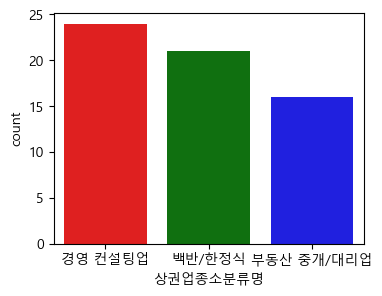

In [21]:
## 입력: station, dst_th
station='성수'
dst_th=1 # 단위: km

## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기

## 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

## df_seoul에 거리 column 추가하기 (apply활용)

## dst_th안에 있는 상점 중에 가장 많이 있는 top3 소분류명과 해당 상점 수 구하기


## top3 소분류명에 해당하는 상점수 bar graph로 그리기
fig=plt.figure(figsize=(4,3), dpi=100)
ax=fig.subplots()
sns.barplot(data=sr1, palette=['red','green','blue'], ax=ax)

## 구한 소분류명에 해당하는 상점들의 필요한 컬럼 가져오기


## 각 상점에 해당하는 color 컬럼 추가하기


## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)

## 지하철역 marekr & cicle 추가


## 선택한 상점들에 대한  marker 추가

## map 확인
m

# 실습풀이

## 실습1)

In [17]:
park='응봉공원'

## 공원의 위도, 경도 구하기
p_lat, p_long=df_fin.loc[df_fin['공원명']==park,['위도','경도']].iloc[0]
p_lat, p_long

## 지하철 데이터 가져오기 (df_station)
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
df_station = df_station[['역명','위도','경도']]
df_station

## 거리 구하는 함수 정의
def get_distance(row):
    s_lat=row['위도']
    s_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

## apply 활용하여 df_station에 '거리' column 추가
df_station['거리']=df_station.apply(get_distance, axis=1)

## 거리가 가장 짧은 top3 지하철역의 이름, 위도, 경도, 거리 구하기
df_station_top3=df_station.sort_values(by='거리').head(3)
df_station_top3

## map 생성
m = folium.Map([p_lat, p_long], zoom_start=15)
## 공원 marekr 추가
_=folium.Marker([p_lat, p_long], tooltip='공원:'+park, icon=folium.Icon(color="red")).add_to(m)

## top3 지하철역 marker 추가를 위한 for loop 수행
for ii in range(len(df_station_top3)):
    station, s_lat, s_long, dist=df_station_top3.iloc[ii]
    
    ## 지하철역 marekr 추가
    _=folium.Marker([s_lat, s_long], tooltip='Top{}_역: {}'.format(ii+1, station),
                    icon=folium.Icon(color="green")).add_to(m)
    
    ## 공원과 지하철 연결하는 선 추가
    _=folium.PolyLine(locations=[[s_lat, s_long],[p_lat, p_long]],
                      tooltip='{:.2f}km'.format(dist), weight=10).add_to(m)

## map 확인
m

(37.54498748, 127.0053039)

,역명,위도,경도
0,서울,37.553150,126.972533
1,시청,37.563590,126.975407
2,종각,37.570203,126.983116
3,종로3가,37.570429,126.992095
4,종로5가,37.570971,127.001900
...,...,...,...
271,남한산성입구,37.451568,127.159845
272,단대오거리,37.445057,127.156735
273,신흥,37.440952,127.147590
274,수진,37.437575,127.140936


,역명,위도,경도,거리
199,버티고개,37.547933,127.006948,0.358167
198,한강진,37.539560,127.001729,0.680857
76,금호,37.548269,127.015785,0.993469


# 실습2) 주어진 지하철역(station)과 주어진 반경(dst_th)에 있는 상점들에 대해서, 가장 많은 소분류 top 3개의 분포를 bar그래프로 나타내고, top1, top2, top3 소분류에 해당하는 각 상점들을 각각 red, green, blue의 circle로 지도에 나타내시오

In [13]:
df_seoul=pd.read_csv('data/상권정보_서울_202403_18cols.csv', sep=',')
df_seoul=df_seoul.iloc[::20]

상권업종소분류명
경영 컨설팅업       24
백반/한정식        21
부동산 중개/대리업    16
Name: count, dtype: int64

C:\Users\jjmsk\AppData\Local\Temp\ipykernel_50484\2510112077.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sr1, palette=['red','green','blue'], ax=ax)


<Axes: xlabel='상권업종소분류명', ylabel='count'>

61

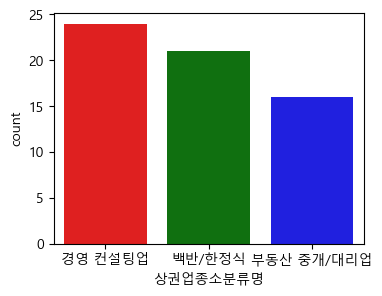

In [20]:
## 입력: station, dst_th
station='성수'
dst_th=1 # 단위: km

## 지하철역 데이터 load 후 해당 지하철역 위도, 경도 가져오기
df_station = pd.read_csv("data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv", encoding="cp949")
station_latlong=df_station.loc[df_station['역명']==station, ['위도','경도']]
s_lat, s_long=station_latlong.iloc[0]

## 거리 구하는 함수 정의
def get_distance(row):
    p_lat=row['위도']
    p_long=row['경도']
    return haversine((s_lat, s_long), (p_lat,p_long), unit = 'km')

## df_seoul에 거리 column 추가하기 (apply활용)
df_seoul['거리']=df_seoul.apply(get_distance, axis=1)

## dst_th안에 있는 상점 중에 가장 많이 있는 top3 소분류명과 해당 상점 수 구하기
df_selected=df_seoul.loc[df_seoul['거리']<=dst_th]
sr1=df_selected['상권업종소분류명'].value_counts().head(3)
sr1

## top3 소분류명에 해당하는 상점수 bar graph로 그리기
fig=plt.figure(figsize=(4,3), dpi=100)
ax=fig.subplots()
sns.barplot(data=sr1, palette=['red','green','blue'], ax=ax)

## 구한 소분류명에 해당하는 상점들의 필요한 컬럼 가져오기
df_selected=df_selected.loc[df_selected['상권업종소분류명'].isin(sr1.index),['상권업종소분류명', '상호명', '위도', '경도']]

## 각 상점에 해당하는 color 컬럼 추가하기
category_top3=pd.Series(data=['red','green','blue'], index=sr1.index)
df_selected['color']=df_selected['상권업종소분류명'].map(category_top3)

## map 생성
m = folium.Map([s_lat, s_long], zoom_start=15)

## 지하철역 marekr & cicle 추가
_=folium.Marker([s_lat, s_long], tooltip='역:'+station, icon=folium.Icon(color="red")).add_to(m)
_=folium.Circle([s_lat, s_long], radius=dst_th*1000, color='blue', fill=True).add_to(m)# radius -> 반지름 단위(m)

## 선택한 상점들에 대한  marker 추가
len(df_selected)
for ind in df_selected.index:
    cat1, n1, lat1, long1, col1=df_selected.loc[ind]
    _=folium.Circle([lat1, long1], tooltip='{}({})'.format(n1, cat1), color=col1).add_to(m)
    
## map 확인
m